# Knowledge Check 3

After downloading your completed knowledge check as .ipynb, please upload to canvas as: **YourBCEmail_kc3.ipynb** (e.g. it would be steffese_kc3.ipynb for me).

## Setup


We will load the data from our shared Google Drive with the following code snippet.

It will ask for permission to access your Google Drive and will require you to paste the provided authorization code.

(If this doesn't work for some reason, you can also just upload the data manually.)


In [3]:
# YOU ONLY NEED TO RUN THIS CELL ONCE AT THE BEGINNING OF YOUR SESSION.

install.packages("googledrive")
library(googledrive)
library(tidyverse)
library(scales)

options(scipen = 999) # to prevent scientific notation

# Will ask you to click the URL, then choose your BC email address,
# accept permissions by clicking Continue, copy over the
# authorization code by clicking "Copy to Clipboard".
# Then paste it into prompt below and press Enter.
# Once that's done this notebook can access files in your
# Google Drive.
googledrive::drive_auth(use_oob = TRUE, cache = FALSE)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=aaae68f32db192fc498f53dcca851010&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbUhkTVR2NlAwbnJrVVBkLXJCV3FFVmhVQ1lZLW0wanRsOUxJLTRPZHZVa2d1YW9EM1FFRnJTU0ctd3JKQy1ZQSIsInN0YXRlIjoiYWFhZTY4ZjMyZGIxOTJmYzQ5OGY1M2RjY2E4NTEwMTAifQ==


In [4]:
load_data <- function(file_path){

# Find the shared data files.
csv_file <- drive_get(path = file_path)

# Load the data files.
df <- csv_file %>%
  drive_read_string() %>%
  read.csv(text = .)

return(df)
}

# Load the data files.
df_music <- load_data(file_path = "ISYS3350/data/music.csv") |>
  select(
    index = Index,
    highest_charting_position = Highest.Charting.Position,
    song_name = Song.Name,
    artist = Artist,
    streams = Streams,
    followers = Artist.Followers,
    duration = Duration..ms.,
    highest_charting_position = Highest.Charting.Position,
    chord = Chord,
    genre = Genre
    )

df_football <- load_data(file_path = "ISYS3350/data/college_football_2000_2020.csv")

# If everything worked, this should show the first 3 rows of each dataframe.
df_music |> head(12)
df_football |> head(10)


✔ The input `path` resolved to exactly 1 file.

No encoding supplied: defaulting to UTF-8.

✔ The input `path` resolved to exactly 1 file.

No encoding supplied: defaulting to UTF-8.



,index,highest_charting_position,song_name,artist,streams,followers,duration,chord,genre
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,1,1,Beggin',Måneskin,"48,633,449",3377762,211560,B,"['indie rock italiano', 'italian pop']"
2,2,2,STAY (with Justin Bieber),The Kid LAROI,"47,248,719",2230022,141806,C#/Db,['australian hip hop']
3,3,1,good 4 u,Olivia Rodrigo,"40,162,559",6266514,178147,A,['pop']
4,4,3,Bad Habits,Ed Sheeran,"37,799,456",83293380,231041,B,"['pop', 'uk pop']"
5,5,5,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,"33,948,454",5473565,212000,D#/Eb,"['lgbtq+ hip hop', 'pop rap']"
6,6,1,MONTERO (Call Me By Your Name),Lil Nas X,"30,071,134",5473565,137876,G#/Ab,"['lgbtq+ hip hop', 'pop rap']"
7,7,3,Kiss Me More (feat. SZA),Doja Cat,"29,356,736",8640063,208867,G#/Ab,"['dance pop', 'pop']"
8,8,2,Todo De Ti,Rauw Alejandro,"26,951,613",6080597,199604,D#/Eb,"['puerto rican pop', 'trap latino']"
9,9,3,Yonaguni,Bad Bunny,"25,030,128",36142273,206710,C#/Db,"['latin', 'reggaeton', 'trap latino']"


,Date,Season,Team,Opponent,Result,Points_For,Points_Against,Spread,Played,Home,Neutral_Location,OT,Team_FBS,Opp_FBS,Game_ID
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<int>,<lgl>,<lgl>,<int>,<int>,<int>
1,3/28/2021,2020,Tennessee State,Tennessee-Martin,W,26,24,2,TRUE,1,FALSE,FALSE,0,0,401279119
2,3/28/2021,2020,Tennessee-Martin,Tennessee State,L,24,26,-2,TRUE,0,FALSE,FALSE,0,0,401279119
3,3/28/2021,2020,Eastern Illinois,Murray State,L,27,41,-14,TRUE,0,FALSE,FALSE,0,0,401279120
4,3/28/2021,2020,Murray State,Eastern Illinois,W,41,27,14,TRUE,1,FALSE,FALSE,0,0,401279120
5,3/28/2021,2020,Tennessee Tech,Southeast Missouri State,L,21,24,-3,TRUE,0,FALSE,FALSE,0,0,401279121
6,3/28/2021,2020,Southeast Missouri State,Tennessee Tech,W,24,21,3,TRUE,1,FALSE,FALSE,0,0,401279121
7,3/28/2021,2020,Jacksonville State,Austin Peay,L,10,13,-3,TRUE,1,FALSE,FALSE,0,0,401279122
8,3/28/2021,2020,Austin Peay,Jacksonville State,W,13,10,3,TRUE,0,FALSE,FALSE,0,0,401279122
9,3/28/2021,2020,Duquesne,Bryant,W,20,10,10,TRUE,0,FALSE,FALSE,0,0,401284006


And now it's your turn:

## 1.) Superstars

* Streaming services have been argued to increase so-called **superstar effects** in the music industry (based on this famous [Rosen, AER 1981 paper](https://home.uchicago.edu/~vlima/courses/econ201/Superstars.pdf)), i.e. the idea that "small numbers of people dominate the activities in which they engage". Let's test this.


1. **First, notice that several songs are collaborations by multiple artists. For example, Qué Más Pues? was a collaboration by 2 artists - J Balvin and Maria Becerra. Let's assume that each collaborating artist was equally important in a song's success. So let's split each song into mulitple rows - one for each artist involved. Then divide the number of `streams` and `followers` by the number of artists that were involved in that song. Which song had the largest number of artists?**


2. **Second, for each artist, calculate the total number of `streams`, as well as the average number of `followers`. Which artist was the most successful based on each of these metrics?**

3. **Third, let's focus on the number of streams. Create a rank variable based on the total number of streams, `rank_streams` - the most streamed artist should be first. Then, calculate a cumulative share of all streams, `cum_share_streams`. What percentage of all streams goes to the top artist? What about the top 10? Top 100? Top 500?**

4. **Plot the cumulative share of streams against the artist rank. Include a line that would indicate a perfectly fair distribution. What do you notice?**

*Hint: You can use `geom_abline(intercept = a, slope = b)` to add a line for `y = ax + b`.*








**Your Answer:**

In [ ]:
df_music <- df_music |>
  mutate(
    streams = parse_number(streams, locale = locale(grouping_mark = ","))
  )

In [10]:
# Split the artist column into multiple rows
df_music_expanded <- df_music |>
  separate_rows(artist, sep = ", ") |>
  group_by(index) |>
  mutate(
    num_artists = n(),
    streams = streams / num_artists,
    followers = followers / num_artists
  ) |>
  ungroup()

head(df_music_expanded,20)

# Determine which song had the largest number of artists
max_artists_song <- df_music_expanded |>
  group_by(song_name) |>
  summarise(num_artists = first(num_artists)) |>
  arrange(-num_artists) |>
  slice(1)

head(max_artists_song)

df_music_expanded |> group_by(artist) |>



index,highest_charting_position,song_name,artist,streams,followers,duration,chord,genre,num_artists
<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<int>
1,1,Beggin',Måneskin,48633449,3377762.0,211560,B,"['indie rock italiano', 'italian pop']",1
2,2,STAY (with Justin Bieber),The Kid LAROI,47248719,2230022.0,141806,C#/Db,['australian hip hop'],1
3,1,good 4 u,Olivia Rodrigo,40162559,6266514.0,178147,A,['pop'],1
4,3,Bad Habits,Ed Sheeran,37799456,83293380.0,231041,B,"['pop', 'uk pop']",1
5,5,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,33948454,5473565.0,212000,D#/Eb,"['lgbtq+ hip hop', 'pop rap']",1
6,1,MONTERO (Call Me By Your Name),Lil Nas X,30071134,5473565.0,137876,G#/Ab,"['lgbtq+ hip hop', 'pop rap']",1
7,3,Kiss Me More (feat. SZA),Doja Cat,29356736,8640063.0,208867,G#/Ab,"['dance pop', 'pop']",1
8,2,Todo De Ti,Rauw Alejandro,26951613,6080597.0,199604,D#/Eb,"['puerto rican pop', 'trap latino']",1
9,3,Yonaguni,Bad Bunny,25030128,36142273.0,206710,C#/Db,"['latin', 'reggaeton', 'trap latino']",1


song_name,num_artists
<chr>,<int>
Bande organisée,9


In [11]:
artist_summary <- df_music_expanded |>
  group_by(artist) |>
  summarise(
    total_streams = sum(streams),
    avg_followers = mean(followers)
  ) |>
  ungroup()

# Most successful artist based on total streams
top_artist_streams <- artist_summary |>
  arrange(-total_streams) |>
  slice(1)

# Most successful artist based on average followers
top_artist_followers <- artist_summary |>
  arrange(-avg_followers) |>
  slice(1)

In [12]:
artist_streams_summary <- df_music_expanded |>
  group_by(artist) |>
  summarise(total_streams = sum(streams)) |>
  ungroup() |>
  arrange(-total_streams) |>
  mutate(rank_streams = row_number())

# 2. Calculate cumulative share of streams
total_all_streams <- sum(artist_streams_summary$total_streams)
artist_streams_summary <- artist_streams_summary |>
  mutate(cum_share_streams = cumsum(total_streams) / total_all_streams)

# 3. Extract percentage for top artists
top_1_pct <- artist_streams_summary$cum_share_streams[1]
top_10_pct <- artist_streams_summary$cum_share_streams[10]
top_100_pct <- artist_streams_summary$cum_share_streams[100]
top_500_pct <- ifelse(nrow(artist_streams_summary) >= 500, artist_streams_summary$cum_share_streams[500], NA)

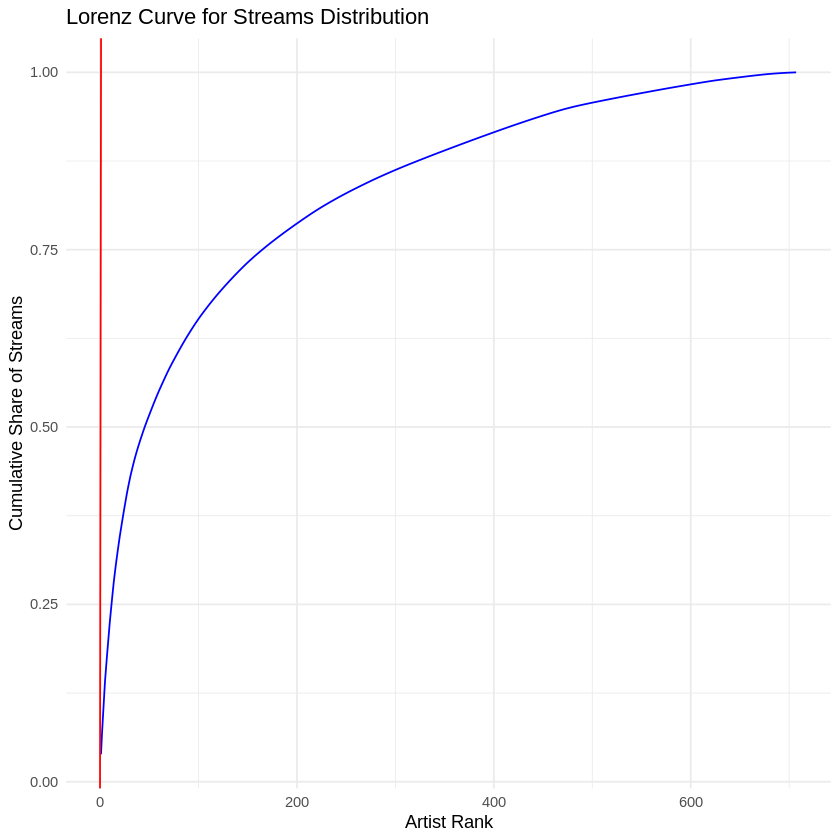

In [14]:
p <- ggplot(artist_streams_summary, aes(x = rank_streams, y = cum_share_streams)) +
  geom_line(color = "blue") +  # Lorenz curve (cumulative share)
  geom_abline(intercept = 0, slope = 1, color = "red") +  # Line of equality
  labs(title = "Lorenz Curve for Streams Distribution",
       x = "Artist Rank",
       y = "Cumulative Share of Streams") +
  theme_minimal()

print(p)

The deviation from the red line indicates an inequality in the distribution of streams across artists.

## 2.) Taylor's Version

To be able to own her own music, Taylor Swift began rerecording her old six albums in 2020 as Taylor's Version ([Source](https://en.wikipedia.org/wiki/Taylor_Swift_masters_controversy)).


* **Which version was more popular in our data? If you identify multiple metrics for popularity, show them all.**

*Hint: Some characters can be very hard to distinguish with our eyes.*

**Your Answer:**

In [15]:

# Filter data for Taylor Swift songs
taylor_songs <- df_music |>
  filter(str_detect(artist, "Taylor Swift"))

# Split the data into original and Taylor's Version songs
original_songs <- taylor_songs |>
  filter(!str_detect(song_name, "Taylor’s Version"))
taylors_version_songs <- taylor_songs |>
  filter(str_detect(song_name, "Taylor’s Version"))

# Define popularity metrics and compare
popularity_comparison <- data.frame(
  Metric = c("Total Streams", "Highest Charting Position", "Average Followers"),
  Original = c(sum(original_songs$streams), mean(original_songs$highest_charting_position, na.rm = TRUE), mean(original_songs$followers, na.rm = TRUE)),
  Taylors_Version = c(sum(taylors_version_songs$streams), mean(taylors_version_songs$highest_charting_position, na.rm = TRUE), mean(taylors_version_songs$followers, na.rm = TRUE))
)

print(popularity_comparison)


                     Metric        Original Taylors_Version
1             Total Streams 271425161.00000  110055294.0000
2 Highest Charting Position        43.61111        100.3125
3         Average Followers  42227614.00000   42227614.0000


## 3.) Are the Best Songs Easy to Play?

From the few very basic piano lessons I took, I realized that songs that require more black keys tend to be harder to play. Here's the list of black keys required for each key/`chord`:

- Easiest: C (no black keys)
- G, F (1 black key)
- D, A#/Bb (2 black keys)
- A, D#/Eb (3 black keys)
- E, G#/Ab (4 black keys)
- B, C#/Db (5 black keys)
- Hardest: F#/Gb (6 black keys)

**Create the factor variable `num_black_keys` for these 7 levels of difficulty.**

**Then create a more simple factor variable `difficulty`, which only contains 3 levels - easy, medium, and hard. Easy songs have at most 1 black, key, medium ones have at most 3 black keys, and anything above is hard.**

**Which level of `difficulty` is most common among songs that ever made the top 10?**


In [18]:
# 1. Create the num_black_keys variable
df_music <- df_music |>
  mutate(
    num_black_keys = case_when(
      chord %in% c("C") ~ "0",
      chord %in% c("G", "F") ~ "1",
      chord %in% c("D", "A#/Bb") ~ "2",
      chord %in% c("A", "D#/Eb") ~ "3",
      chord %in% c("E", "G#/Ab") ~ "4",
      chord %in% c("B", "C#/Db") ~ "5",
      chord %in% c("F#/Gb") ~ "6",
      TRUE ~ NA_character_
    )
  )

# Convert to ordered factor with levels from 0 to 6
df_music$num_black_keys <- fct_inorder(df_music$num_black_keys)

# 2. Create the difficulty factor variable
df_music <- df_music |>
  mutate(
    difficulty = fct_recode(num_black_keys,
      easy = "0",
      easy = "1",
      medium = "2",
      medium = "3",
      hard = "4",
      hard = "5",
      hard = "6"
    )
  )

# 3. Filter songs that made it to the top 10 and count by difficulty level
top_10_difficulty <- df_music |>
  filter(highest_charting_position <= 10) |>
  count(difficulty) |>
  arrange(-n)

print(top_10_difficulty)


  difficulty  n
1       hard 71
2       easy 32
3     medium 29
4       <NA>  1


In [20]:
head(df_music,10)

,index,highest_charting_position,song_name,artist,streams,followers,duration,chord,genre,num_black_keys,difficulty
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<fct>,<fct>
1,1,1,Beggin',Måneskin,48633449,3377762,211560,B,"['indie rock italiano', 'italian pop']",5,hard
2,2,2,STAY (with Justin Bieber),The Kid LAROI,47248719,2230022,141806,C#/Db,['australian hip hop'],5,hard
3,3,1,good 4 u,Olivia Rodrigo,40162559,6266514,178147,A,['pop'],3,medium
4,4,3,Bad Habits,Ed Sheeran,37799456,83293380,231041,B,"['pop', 'uk pop']",5,hard
5,5,5,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,33948454,5473565,212000,D#/Eb,"['lgbtq+ hip hop', 'pop rap']",3,medium
6,6,1,MONTERO (Call Me By Your Name),Lil Nas X,30071134,5473565,137876,G#/Ab,"['lgbtq+ hip hop', 'pop rap']",4,hard
7,7,3,Kiss Me More (feat. SZA),Doja Cat,29356736,8640063,208867,G#/Ab,"['dance pop', 'pop']",4,hard
8,8,2,Todo De Ti,Rauw Alejandro,26951613,6080597,199604,D#/Eb,"['puerto rican pop', 'trap latino']",3,medium
9,9,3,Yonaguni,Bad Bunny,25030128,36142273,206710,C#/Db,"['latin', 'reggaeton', 'trap latino']",5,hard


## 4.) A Clean Game

The `df_college` data contains every College Football game played since 2000.

1. **First, let's understand the data:**

  1.1. **Which single column *should* define an index? Why does it currently *not* define an index?**

  1.2. **Remove potential duplicates and only keep one row per game. How many games are there in total?**

2. **Second, let's clean the data:**

  - **Turn the `Date` column from type character to type date.**

  - **Create a `month` column that's equal to the unabbreviated month of the game's date (i.e. 'January', not 'Jan' or 1).**

  - **Create a `day_of_week` column that contains the unabbreviated weekday of the game's date (i.e. Monday, not 'Mon' or 1).**

  - **Create a factor (or categorical) `result_cat` column from the `Result` column. Order them, such that a Loss is the first factor.**

  - **Create a binary (TRUE/FALSE) `is_bc_game` column that is TRUE if we (i.e. Boston College) played in the game.**

  - **Create a (TRUE/FALSE/NA) `is_bc_win` column that is TRUE if the game was a Win for us, FALSE if the game was a Loss for us, and NA if it was neither.**


**Your Answer:**

In [30]:

#1.1 The game_id variable should be the index; it is not because there are duplicates.

# Remove duplicates based on Game_ID
df_cleaned <- df_football |> distinct(Game_ID, .keep_all = TRUE)

# Count the total number of games
total_games <- nrow(df_cleaned)
print(total_games)

head(df_cleaned,2)

[1] 28536


,Date,Season,Team,Opponent,Result,Points_For,Points_Against,Spread,Played,Home,Neutral_Location,OT,Team_FBS,Opp_FBS,Game_ID
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<int>,<lgl>,<lgl>,<int>,<int>,<int>
1,3/28/2021,2020,Tennessee State,Tennessee-Martin,W,26,24,2,TRUE,1,FALSE,FALSE,0,0,401279119
2,3/28/2021,2020,Eastern Illinois,Murray State,L,27,41,-14,TRUE,0,FALSE,FALSE,0,0,401279120


In [32]:
# 1. Convert Date column to type date
df_cleaned$Date <- as.Date(df_cleaned$Date, format = "%m/%d/%Y")  # Adjust the format based on your date format if necessary

# 2. Create month column
df_cleaned$month <- month(df_cleaned$Date, label = TRUE, abbr = FALSE)

# 3. Create day_of_week column
df_cleaned$day_of_week <- weekdays(df_cleaned$Date)

# 4. Create result_cat factor column with Loss as the first factor
df_cleaned$result_cat <- factor(df_cleaned$Result, levels = c("Loss", "Win", "Tie"))  # Adjust levels if there are more categories in Result

# 5. Create is_bc_game binary column
df_cleaned$is_bc_game <- df_cleaned$Team == "Boston College" | df_cleaned$Opponent == "Boston College"

# 6. Create is_bc_win column
df_cleaned$is_bc_win <- case_when(
  df_cleaned$is_bc_game & df_cleaned$Result == "Win" ~ TRUE,
  df_cleaned$is_bc_game & df_cleaned$Result == "Loss" ~ FALSE,
  TRUE ~ NA_real_
)
df_cleaned$is_bc_win <- as.logical(df_cleaned$is_bc_win)

head(df_cleaned, 2)


,Date,Season,Team,Opponent,Result,Points_For,Points_Against,Spread,Played,Home,Neutral_Location,OT,Team_FBS,Opp_FBS,Game_ID,month,day_of_week,result_cat,is_bc_game,is_bc_win
,<date>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<int>,<lgl>,<lgl>,<int>,<int>,<int>,<ord>,<chr>,<fct>,<lgl>,<lgl>
1,2021-03-28,2020,Tennessee State,Tennessee-Martin,W,26,24,2,TRUE,1,FALSE,FALSE,0,0,401279119,March,Sunday,NA,FALSE,NA
2,2021-03-28,2020,Eastern Illinois,Murray State,L,27,41,-14,TRUE,0,FALSE,FALSE,0,0,401279120,March,Sunday,NA,FALSE,NA


## 5.) College Football Facts



Now Let's answer some questions:

1. **Which game had the highest `Spread`? Who lost against whom?**

2. **Which tied game had the highest number of points?**

3. **How many games did we (Boston College) play? What's our win percentage?**

4. **In which month of the year do we have the worst win percentage (you can ignore months that had fewer than 5 games in total)?**

**Your Answer:**

In [36]:
# 1. Game with the highest Spread
highest_spread_game <- df_cleaned %>%
  arrange(desc(Spread)) %>%
  slice(1)

# 2. Tied game with the highest number of points
highest_tied_game <- df_cleaned %>%
  filter(Result == "Tie") %>%
  arrange(desc(Points_For + Points_Against)) %>%
  slice(1)

# 3. Number of games BC played and win percentage
bc_games <- df_cleaned %>%
  filter(is_bc_game)

total_games <- nrow(bc_games)
wins <- sum(bc_games$Result == "Win", na.rm = TRUE)
win_percentage <- (wins / total_games) * 100

# 4. Month with the worst win percentage (ignoring months with fewer than 5 games)
monthly_win_rate <- bc_games %>%
  group_by(Month = month(Date, label = TRUE, abbr = FALSE)) %>%
  summarise(
    Total_Games = n(),
    Wins = sum(Result == "Win", na.rm = TRUE),
    Win_Percentage = (Wins / Total_Games) * 100
  ) %>%
  filter(Total_Games >= 5) %>%
  arrange(Win_Percentage) %>%
  slice(1)

# Display results
list(Highest_Spread_Game = highest_spread_game,
     Highest_Tied_Game = highest_tied_game,
     BC_Total_Games = total_games,
     BC_Win_Percentage = win_percentage,
     Worst_Monthly_Win_Rate = monthly_win_rate)


$Highest_Spread_Game
        Date Season Team    Opponent Result Points_For Points_Against Spread
1 2000-09-02   2000 Troy Alabama A&M      W        128             13    115
  Played Home Neutral_Location    OT Team_FBS Opp_FBS   Game_ID     month
1   TRUE    0            FALSE FALSE        1       0 202462010 September
  day_of_week result_cat is_bc_game is_bc_win
1    Saturday       <NA>      FALSE        NA

$Highest_Tied_Game
 [1] Date             Season           Team             Opponent        
 [5] Result           Points_For       Points_Against   Spread          
 [9] Played           Home             Neutral_Location OT              
[13] Team_FBS         Opp_FBS          Game_ID          month           
[17] day_of_week      result_cat       is_bc_game       is_bc_win       
<0 rows> (or 0-length row.names)

$BC_Total_Games
[1] 265

$BC_Win_Percentage
[1] 0

$Worst_Monthly_Win_Rate
# A tibble: 1 × 4
  Month  Total_Games  Wins Win_Percentage
  <ord>        <int> <int>          <dbl>
1 August           7     0              0

## 6.) College Football in Motion


Let's pivot and then plot some data:

- **Create a dataset that contains the column `Season`, and the number of games played (`num_games`), won (`num_win`), and lost (`num_loss`) by BC.**

- **Now pivot this data to contain just the columns `Season`, `variable` (taking the values: `num_games`, `num_win`, and `num_loss`), and `value` (taking the corresponding values for how many times we played, won, and lost in that season).**

- **Make a bar plot that shows our number of games, wins, and losses on the y axis and the season on the x axis.**

- **Make the plot look nice by changing at least 5 things (i.e. add a title, add a theme, change axis labels, ...).**


  

- OPTIONAL: (So far, the following only works if you run it in RStudio.)
  - Once the plot works, store it as `plot1`. Then run the code below. It should create an animated gif of your plot, which slowly reveals BC's performance in each season.


 ```
 install.packages(c("gganimate", "gifski"))
 gif1 <- plot1 + transition_states(Season) + shadow_mark(alpha = 0.3, size = 0.5)
 gif1
 ```

**Your Answer:**

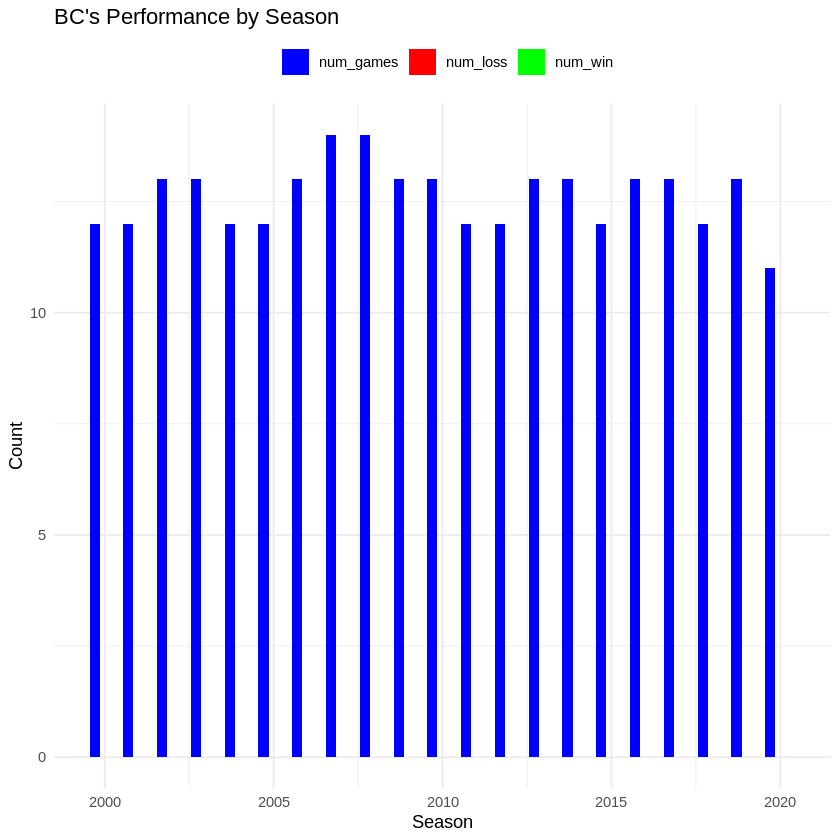

In [37]:
# 1. Create the dataset
bc_stats <- df_cleaned %>%
  filter(is_bc_game) %>%
  group_by(Season) %>%
  summarise(
    num_games = n(),
    num_win = sum(Result == "Win", na.rm = TRUE),
    num_loss = sum(Result == "Loss", na.rm = TRUE)
  )

# 2. Pivot the data
bc_pivot <- bc_stats %>%
  pivot_longer(cols = c(num_games, num_win, num_loss), names_to = "variable", values_to = "value")

# 3. & 4. Plot the data and make it look nice
plot1 <- ggplot(bc_pivot, aes(x = Season, y = value, fill = variable)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "BC's Performance by Season",
       x = "Season",
       y = "Count") +
  theme_minimal() +
  scale_fill_manual(values = c("num_games" = "blue", "num_win" = "green", "num_loss" = "red")) +
  theme(legend.position = "top", legend.title = element_blank())

print(plot1)